##### Data.World description:

"""
This data set is no longer updated.
The information it contains is included in the council energy consumption data set. This dataset lists the costs and consumtion of gas and electricity of all schools in Leeds (council managed or otherwise) which use/used the Leeds City Council (LCC) energy contract supplied by Engie UK.

Please note :

- Comsumption values are in Kilowatt hours (kWh). 
- The council's current supplier of electricity and gas is Engie UK. The council and Engie work in partnership to identify times when the price for the raw commodity (electricity or gas) is competitive on the market. The council will buy a specific volume based upon price and the shape of our consumption over the year. On top of this, Engie will bill the authority for any associated costs such as distribution, network, transmission etc. plus an administration fee. These costs will then be reflected in the overall cost of the commodity at each site.
- Not all schools have opted to use the council supplier for energy. Where this is the case the school will procure their own contract with a supplier and the council will not hold any data regarding their consumption or costs. Any enquiry regarding this will need to be directed through the school's Business Manager.
- Some schools may transfer into or out of the LCC contract part way through a financial year which will mean that that the data held by the council will not reflect a full financial year. This dataset only shows the costs and consumption of energy whilst the school is/was on the LLC contract.
- Some schools may have more than one meter (for different parts of the building or where they are transferring to smart meters) in which case the data for all meters is indicated in the dataset.
"""

Source: https://data.world/datagov-uk/a568161d-abde-4c1c-a763-c01aba3021cd

#####  From its original source maintext:

"""
Leeds schools energy costs

This data set is no longer updated. The information it contains is included in the council energy consumption data set.

This dataset lists the costs and consumption of gas and electricity of all schools in Leeds (council managed or otherwise) which use/used the Leeds City Council (LCC) energy contract supplied by Engie UK.

Please note:

Comsumption values are in Kilowatt hours (kWh).

The council's current supplier of electricity and gas is Engie UK. The council and Engie work in partnership to identify times when the price for the raw commodity (electricity or gas) is competitive on the market. The council will buy a specific volume based upon price and the shape of our consumption over the year. On top of this, Engie will bill the authority for any associated costs such as distribution, network, transmission etc. plus an administration fee. These costs will then be reflected in the overall cost of the commodity at each site.

Not all schools have opted to use the council supplier for energy. Where this is the case the school will procure their own contract with a supplier and the council will not hold any data regarding their consumption or costs. Any enquiry regarding this will need to be directed through the school's Business Manager.
Some schools may transfer into or out of the LCC contract part way through a financial year which will mean that that the data held by the council will not reflect a full financial year. This dataset only shows the costs and consumption of energy whilst the school is/was on the LLC contract.

Some schools may have more than one meter (for different parts of the building or where they are transferring to smart meters) in which case the data for all meters is indicated in the dataset.
"""

Source: https://ckan.publishing.service.gov.uk/dataset/leeds-schools-energy-costs

In [1]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('school_electricity.csv')

In [3]:
df

,Site,Account,Cost 2015/16,Cost 2016/17,Consumption 2015/16,Consumption 2016/17
0,Primary School - Aberford Church of England,Electricity - 10009034,"�7,144.48","�6,218.28","57,144","59,569"
1,Primary School - Adel,Electricity - 10008021,"�14,412.37","�11,513.10","103,011","89,316"
2,Primary School - Adel St John The Baptist Chur...,Electricity - 10008019,"�10,210.87","�8,701.97","73,642","66,803"
3,Primary School - All Saints Church of England ...,Electricity - 10008649,"�10,493.40","�9,901.97","95,551","92,596"
4,Primary School - All Saints Church of England ...,Electricity - 10008648,�53.62,�13.38,1,0
...,...,...,...,...,...,...
332,Specialist Inclusive Learning Centre - North W...,Electricity - 10007546,"�5,362.68","�4,101.13","39,094","31,580"
333,Specialist Inclusive Learning Centre - North W...,Electricity - 10140711,�245.10,�63.74,"1,459",720
334,Specialist Inclusive Learning Centre - North W...,Electricity - 10012134,"�12,173.38","�10,962.73","98,665","80,830"
335,Specialist Inclusive Learning Centre - West - ...,Electricity - 10012256,"�33,463.56","�29,995.90","287,124","243,076"


In [4]:
print("Shape: ", df.shape)

Shape:  (337, 6)


In [5]:
df.isnull().sum()

Site                    1
Account                 1
Cost 2015/16            7
Cost 2016/17           12
Consumption 2015/16     7
Consumption 2016/17    12
dtype: int64

In [6]:
# drop null age rows
df.dropna(subset = ["Site", 'Account', 'Consumption 2015/16', 'Consumption 2016/17'], inplace=True)
print(df.isnull().sum())

Site                   0
Account                0
Cost 2015/16           0
Cost 2016/17           0
Consumption 2015/16    0
Consumption 2016/17    0
dtype: int64


In [16]:
print("Shape: ", df.shape)

Shape:  (319, 6)


In [7]:
costs = [str(i)[1:].replace(',', '') for i in df['Cost 2015/16'].values]
clean_costs = []
for cost in costs:
    try:
        cost = float(cost)
    except ValueError:
        cost = str(cost)
        cost = float(cost[1:])
    clean_costs.append(cost)
df['Cost 2015/16'] = clean_costs

costs = [str(i)[1:].replace(',', '') for i in df['Cost 2016/17'].values]
clean_costs = []
for cost in costs:
    try:
        cost = float(cost)
    except ValueError:
        cost = str(cost)
        cost = float(cost[1:])
    clean_costs.append(cost)
df['Cost 2016/17'] = clean_costs

In [8]:
consumption = [i for i in df['Consumption 2015/16'].values]
clean_cons_2015 = []
for data in consumption:
    data = str(data)
    if ',' in data and '.' in data:
        clean_cons_2015.append(float(data.replace(',', '')))
    elif ',' in data and not ('.' in data):
        if Counter(data)[','] > 1:
            xdata = data.replace(',', '')
            right_side = xdata[-3:]
            left_side = xdata[:-3]
            clean_cons_2015.append(float(f'{left_side}.{right_side}'))
        else:
            clean_cons_2015.append(float(data.replace(',', '.')))
    else:
        clean_cons_2015.append(float(data))

consumption = [i for i in df['Consumption 2016/17'].values]
clean_cons_2016 = []
for data in consumption:
    data = str(data)
    if ',' in data and '.' in data:
        clean_cons_2016.append(float(data.replace(',', '')))
    elif ',' in data and not ('.' in data):
        if Counter(data)[','] > 1:
            xdata = data.replace(',', '')
            right_side = xdata[-3:]
            left_side = xdata[:-3]
            clean_cons_2016.append(float(f'{left_side}.{right_side}'))
        else:
            clean_cons_2016.append(float(data.replace(',', '.')))
    else:
        clean_cons_2016.append(float(data))

df['Consumption 2015/16'] = clean_cons_2015
df['Consumption 2016/17'] = clean_cons_2016

2:  57,144
2:  103,011
2:  73,642
2:  95,551
3:  1
2:  28,749
2:  97,723
2:  146,453
2:  33,676
2:  122,943
2:  79,444
2:  75,751
2:  97,328
2:  213,806
2:  47,786
3:  400
2:  25,729
2:  5,031
2:  80,884
2:  119,662
2:  105,714
2:  53,052
2:  96,337
2:  39,206
2:  90,333
3:  228
2:  2,461
2:  124,586
2:  111,137
2:  1,158
2:  158,453
2:  17,535
2:  35,755
3:  0
2:  20,731
2:  6,996
2:  37,758
2:  25,346
2:  109,035
2:  1,439
2:  34,547
2:  49,150
2:  157,537
2:  4,362
2:  31,434
2:  275,270
2:  4,879
2:  39,850
2:  25,943
2:  11,484
2:  15,624
2:  12,878
2:  78,771
2:  1,984
2:  83,257
2:  51,420
2:  100,787
2:  213,546
2:  90,186
2:  117,759
2:  24,945
2:  154,448
2:  57,688
2:  17,513
2:  17,184
2:  154,653
2:  98,262
2:  80,315
2:  67,540
2:  83,599
2:  96,430
2:  19,124
2:  28,684
2:  17,501
2:  14,614
2:  5,037
2:  14,234
2:  86,676
2:  38,483
2:  13,136
3:  362
2:  117,204
2:  150,474
2:  51,044
2:  10,741
2:  79,904
2:  34,909
2:  80,124
2:  129,719
2:  164,657
2:  140,267
2:  1

In [9]:
df.head()

,Site,Account,Cost 2015/16,Cost 2016/17,Consumption 2015/16,Consumption 2016/17
0,Primary School - Aberford Church of England,Electricity - 10009034,7144.48,6218.28,57.144,59.569
1,Primary School - Adel,Electricity - 10008021,14412.37,11513.10,103.011,89.316
2,Primary School - Adel St John The Baptist Chur...,Electricity - 10008019,10210.87,8701.97,73.642,66.803
3,Primary School - All Saints Church of England ...,Electricity - 10008649,10493.40,9901.97,95.551,92.596
4,Primary School - All Saints Church of England ...,Electricity - 10008648,53.62,13.38,1.000,0.000


In [10]:
print("Unique values in every column \n"+'-'*25)
for i in df.columns:
    print("\t"+i+" = ",len(set(df[i])))

Unique values in every column 
-------------------------
	Site =  218
	Account =  319
	Cost 2015/16 =  316
	Cost 2016/17 =  316
	Consumption 2015/16 =  313
	Consumption 2016/17 =  312


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319 entries, 0 to 335
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Site                 319 non-null    object 
 1   Account              319 non-null    object 
 2   Cost 2015/16         319 non-null    float64
 3   Cost 2016/17         319 non-null    float64
 4   Consumption 2015/16  319 non-null    float64
 5   Consumption 2016/17  319 non-null    float64
dtypes: float64(4), object(2)
memory usage: 17.4+ KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cost 2015/16,319.0,10564.444044,14199.778862,25.80,2542.880,7695.680,13012.1600,135603.740
Cost 2016/17,319.0,10056.841912,12731.475089,13.38,2198.340,7313.910,13010.5150,119392.410
Consumption 2015/16,319.0,97.766683,143.213655,0.00,25.478,68.092,109.1770,1282.079
Consumption 2016/17,319.0,90.988401,135.158363,0.00,19.750,63.658,102.6845,1129.384


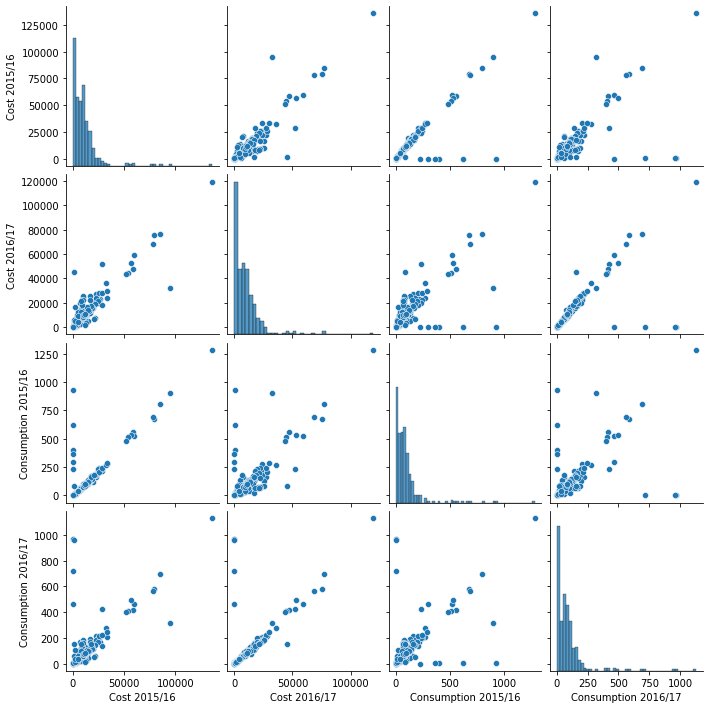

In [14]:
sns.pairplot(df)